In [1]:
# import 工具库
import pandas as pd
import numpy as np
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
label          891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [3]:
df_train.describe()

,PassengerId,label,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


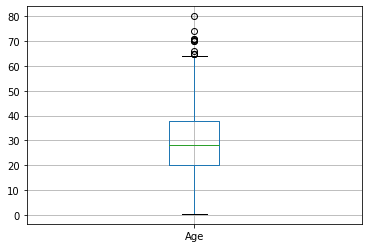

In [5]:
#变量的百分位以及离群点
#事实上不做这种分析也没关系，从最终的模型角度来筛选，会大大减少工作量
df_train.boxplot(column='Age')

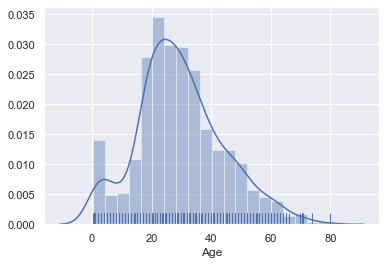

In [13]:
age=df_train.Age.dropna().copy()
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))
# kde控制是否画kde曲线，bins是分桶数，rug控制是否画样本点
sns.distplot(age,kde=True,bins=20,rug=True)

In [14]:
#判断一下y有几类
df_train.label.unique()

array([0, 1], dtype=int64)

In [15]:
import pyecharts

In [19]:
### 1、数据预处理：缺失值
# * pandas fillna
# * sklearn Imputer
df_train['Age'].sample(10)

115    21.0
372    19.0
771    48.0
379    19.0
855    18.0
231    29.0
641    24.0
854    44.0
303     NaN
0      22.0
Name: Age, dtype: float64

In [20]:
df_train['Age'].fillna(value=df_train['Age'].mean()).sample(10)

283    19.000000
168    29.699118
783    29.699118
506    33.000000
719    33.000000
421    21.000000
674    29.699118
19     29.699118
538    29.699118
454    29.699118
Name: Age, dtype: float64

In [21]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
age = imp.fit_transform(df_train[['Age']].values).copy()
df_train.loc[:,'Age'] = df_train['Age'].fillna(value=df_train['Age'].mean()).copy()
df_train.head(10)

D:\develop\anaconda\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [22]:
# 取对数等变换
import numpy as np
log_age = df_train['Age'].apply(lambda x:np.log(x))
df_train.loc[:,'log_age'] = log_age
df_train.head(5)

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348


In [24]:
# 5 取对数等变换
import numpy as np
log_age = df_train['Age'].apply(lambda x:np.log(x))
df_train.loc[:,'log_age'] = log_age
df_train.head(5)

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348


In [25]:
# 幅度缩放，将每一列的数据标准化为正态分布的
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
fare_std_trans = std_scaler.fit_transform(df_train[['Fare']])

In [26]:
df_train.columns

Index(['PassengerId', 'label', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'log_age'],
      dtype='object')

In [27]:
#中位数或者四分位数去中心化数据，对异常值不敏感
from sklearn.preprocessing import robust_scale
fare_robust_trans = robust_scale(df_train[['Fare','Age']])

In [28]:
fare_robust_trans

array([[-0.3120106 , -0.59223982],
       [ 2.46124229,  0.63852941],
       [-0.28277666, -0.28454751],
       ...,
       [ 0.38960398,  0.        ],
       [ 0.67328148, -0.28454751],
       [-0.29035583,  0.17699095]])

In [29]:
#将同一行数据规范化,前面的同一变为1以内也可以达到这样的效果
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
fare_normal_trans = normalizer.fit_transform(df_train[['Age','Fare']])
fare_normal_trans

array([[0.94975704, 0.31298812],
       [0.47041706, 0.88244422],
       [0.95655127, 0.29156418],
       ...,
       [0.78483999, 0.61969847],
       [0.65493054, 0.75568908],
       [0.97190276, 0.2353827 ]])

In [ ]:
# 最大最小值
max_age = df_train['Age'].max()
min_age = df_train["Age"].min()

In [30]:
# 分位数,极值处理，我们最粗暴的方法就是将前后1%的值抹去
age_quarter_01 = df_train['Age'].quantile(0.01)
print(age_quarter_01)
age_quarter_99 = df_train['Age'].quantile(0.99)
print(age_quarter_99)

1.0
65.0


In [31]:
#### 四则运算
df_train.loc[:,'family_size'] = df_train['SibSp']+df_train['Parch']+1
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1


In [32]:
df_train.loc[:,'tmp'] = df_train['Age']*df_train['Pclass'] + 4*df_train['family_size']
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,tmp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,74.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,46.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,82.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2,43.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1,109.0


In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
df_train[['SibSp','Parch']].head()

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0


In [34]:
poly_fea = poly.fit_transform(df_train[['SibSp','Parch']])
poly_fea

array([[1., 1., 0., 1., 0., 0.],
       [1., 1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [1., 1., 2., 1., 2., 4.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [35]:
df_train.columns

Index(['PassengerId', 'label', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'log_age',
       'family_size', 'tmp'],
      dtype='object')

In [36]:
#等距切分
df_train.loc[:, 'fare_cut'] = pd.cut(df_train['Fare'], 20)
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,tmp,fare_cut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,74.0,"(-0.512, 25.616]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,46.0,"(51.233, 76.849]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,82.0,"(-0.512, 25.616]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2,43.0,"(51.233, 76.849]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1,109.0,"(-0.512, 25.616]"


In [37]:
df_train['fare_cut'].unique()

[(-0.512, 25.616], (51.233, 76.849], (25.616, 51.233], (256.165, 281.781], (128.082, 153.699], ..., (230.548, 256.165], (102.466, 128.082], (486.713, 512.329], (153.699, 179.315], (204.932, 230.548]]
Length: 11
Categories (11, interval[float64]): [(-0.512, 25.616] < (25.616, 51.233] < (51.233, 76.849] < (76.849, 102.466] ... (204.932, 230.548] < (230.548, 256.165] < (256.165, 281.781] < (486.713, 512.329]]

In [38]:
# 等频切分
df_train.loc[:,'fare_qcut'] = pd.qcut(df_train['Fare'], 10)
df_train.head()

,PassengerId,label,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,log_age,family_size,tmp,fare_cut,fare_qcut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.091042,2,74.0,"(-0.512, 25.616]","(-0.001, 7.55]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.637586,2,46.0,"(51.233, 76.849]","(39.688, 77.958]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.258097,1,82.0,"(-0.512, 25.616]","(7.854, 8.05]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.555348,2,43.0,"(51.233, 76.849]","(39.688, 77.958]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3.555348,1,109.0,"(-0.512, 25.616]","(7.854, 8.05]"


              cut   badrate
9  (-0.001, 7.55]  0.141304
6   (7.55, 7.854]  0.298851
8   (7.854, 8.05]  0.179245
7    (8.05, 10.5]  0.230769
3  (10.5, 14.454]  0.428571


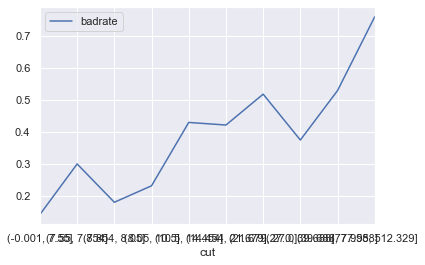

In [41]:
df_train = df_train.sort_values('Fare')
alist = list(set(df_train['fare_qcut']))
badrate={}
for x in alist:
    a = df_train[df_train.fare_qcut == x]
    bad = a[a.label == 1]['label'].count()
    good = a[a.label == 0]['label'].count()
    
    badrate[x] = bad/(bad+good)
f = zip(badrate.keys(),badrate.values())
f = sorted(f,key = lambda x : x[1],reverse = True )
badrate = pd.DataFrame(f)
badrate.columns = pd.Series(['cut','badrate'])
badrate = badrate.sort_values('cut')
print(badrate.head())
badrate.plot('cut','badrate')

In [42]:
#OneHot encoding/独热向量编码 
# category类型
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 271 to 679
Data columns (total 17 columns):
PassengerId    891 non-null int64
label          891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
log_age        891 non-null float64
family_size    891 non-null int64
tmp            891 non-null float64
fare_cut       891 non-null category
fare_qcut      891 non-null category
dtypes: category(2), float64(4), int64(6), object(5)
memory usage: 113.6+ KB


In [43]:
embarked_oht = pd.get_dummies(df_train[['Embarked']])
embarked_oht.head()

,Embarked_C,Embarked_Q,Embarked_S
271,0,0,1
597,0,0,1
302,0,0,1
633,0,0,1
277,0,0,1


In [44]:
fare_qcut_oht = pd.get_dummies(df_train[['fare_qcut']])
fare_qcut_oht.head()

,"fare_qcut_(-0.001, 7.55]","fare_qcut_(7.55, 7.854]","fare_qcut_(7.854, 8.05]","fare_qcut_(8.05, 10.5]","fare_qcut_(10.5, 14.454]","fare_qcut_(14.454, 21.679]","fare_qcut_(21.679, 27.0]","fare_qcut_(27.0, 39.688]","fare_qcut_(39.688, 77.958]","fare_qcut_(77.958, 512.329]"
271,1,0,0,0,0,0,0,0,0,0
597,1,0,0,0,0,0,0,0,0,0
302,1,0,0,0,0,0,0,0,0,0
633,1,0,0,0,0,0,0,0,0,0
277,1,0,0,0,0,0,0,0,0,0


In [45]:
car_sales = pd.read_csv('car_data.csv')
car_sales.head()

,date_t,cnt
0,2012-12-31,NaN
1,2013-01-01,NaN
2,2013-01-02,68.0
3,2013-01-03,36.0
4,2013-01-04,5565.0


In [50]:
car_sales.dtypes,car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 2 columns):
date_t    1512 non-null object
cnt       1032 non-null float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


(date_t     object
 cnt       float64
 dtype: object, None)

In [51]:
car_sales.loc[:,'date'] = pd.to_datetime(car_sales['date_t'])


In [52]:
car_sales.dtypes

date_t            object
cnt              float64
date      datetime64[ns]
dtype: object

In [54]:
# 取出几月份
car_sales.loc[:,'month'] = car_sales['date'].dt.month

In [58]:
car_sales.loc[:,'dom'] = car_sales['date'].dt.day
# 取出一年当中的第几天
car_sales.loc[:,'doy'] = car_sales['date'].dt.dayofyear
# 取出星期几
car_sales.loc[:,'dow'] = car_sales['date'].dt.dayofweek

In [101]:
from pyecharts import options as opts
from pyecharts.charts import WordCloud 
name = [
 '嗨', '小子', '风控', '实战', '金融' ,
 '机器学习', '深度学习', '神经网络学习', '反欺诈规则', '强制性规则', '算法',
 '西瓜书', '数据分析', '反欺诈', '数据挖掘', '评分卡',
 'Xgboost', 'pySpark','python', 'pyEcharts']
value = [
 10000, 6181, 4386, 4055, 2467, 2244, 1898, 1484, 1112,
 965, 847, 582, 555, 550, 462, 366, 360, 282, 273, 265]

words=[(i,j) for i ,j in zip(name,value)]
worldcloud=(
     WordCloud()
     .add("", words, word_size_range=[20, 100])
     .set_global_opts(title_opts=opts.TitleOpts(title="词云实例"))
     )

worldcloud.render('dd.html')
worldcloud.render_notebook()

In [68]:
words

[('Sam S Club', 10000),
 ('Macys', 6181),
 ('Amy Schumer', 4386),
 ('Jurassic World', 4055),
 ('Charter Communications', 2467),
 ('Chick Fil A', 2244),
 ('Planet Fitness', 1868),
 ('Pitch Perfect', 1484),
 ('Express', 1112),
 ('Home', 865),
 ('Johnny Depp', 847),
 ('Lena Dunham', 582),
 ('Lewis Hamilton', 555),
 ('KXAN', 550),
 ('Mary Ellen Mark', 462),
 ('Farrah Abraham', 366),
 ('Rita Ora', 360),
 ('Serena Williams', 282),
 ('NCAA baseball tournament', 273),
 ('Point Break', 265)]

In [67]:
from pyecharts import options as opts
from pyecharts.charts import Page, WordCloud
from pyecharts.globals import SymbolType


words = [
    ("Sam S Club", 10000),
    ("Macys", 6181),
    ("Amy Schumer", 4386),
    ("Jurassic World", 4055),
    ("Charter Communications", 2467),
    ("Chick Fil A", 2244),
    ("Planet Fitness", 1868),
    ("Pitch Perfect", 1484),
    ("Express", 1112),
    ("Home", 865),
    ("Johnny Depp", 847),
    ("Lena Dunham", 582),
    ("Lewis Hamilton", 555),
    ("KXAN", 550),
    ("Mary Ellen Mark", 462),
    ("Farrah Abraham", 366),
    ("Rita Ora", 360),
    ("Serena Williams", 282),
    ("NCAA baseball tournament", 273),
    ("Point Break", 265),
]

worldcloud=(
    WordCloud()
    .add("", words, word_size_range=[20, 100])
    .set_global_opts(title_opts=opts.TitleOpts(title="WordCloud-基本示例"))
    )
worldcloud.render('word.html')

'd:\\jupyter\\July\\特征工程\\word.html'